# 广义线性模型
-   广义线性模型的一大特征就是它可以使用非正态分布
-   正态分布之外的概率分布属于指数分布族

## 组成
-   总体服从的概率分布
-   线性预测算子
-   联系函数

### 概率分布
广义线性模型可用于正态分布、二项分布和泊松分布等多种概率分布。

### 线性预测算子
线性关系式表示的解释变量
比如: β0 + β1 X 气温(℃)

β0 + β1 X 学习时间(minute)

### 联系函数
将响应变量和线性预测算子关联在一起。
月份记录 = β0 + β1 X 学习时间(minute)
概率分布与联系函数的常用的组合如下：
eg:

    `概率分布` `联系函数`  `模型名称`

    `正态分布` `恒等函数`  `正态线性模型`

    `二项分布` `logit函数` `logistic回归模型`

    `泊松分布` `对数函数`  `泊松回归模型`

| 概率分布    | 联系函数   | 模型名称    |
|    ------  |------     | ------      |
|   正态分布  | 恒等函数  | 正态线性模型 |
|   二项分布  | logit函数 | logistic回归模型 |
|   泊松分布  | 对数函数   | 泊松回归模型 |


In [14]:
# 广义线性模型

## logistic回归

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
# 用于估计统计模型的库(部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

<AxesSubplot:xlabel='hours', ylabel='result'>

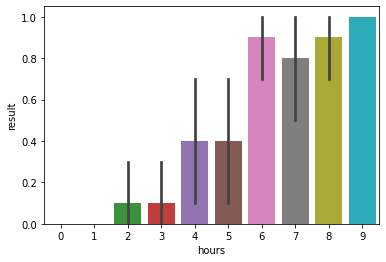

In [16]:
# 读取数据并可视化
test_result = pd.read_csv("./data/6-3-1-logistic-regression.csv")
test_result.head(3)

# 绘图
sns.barplot(x = "hours", y = "result",
                data = test_result)

In [17]:
test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### logistic 回归

In [18]:
from cgi import test
from tkinter.font import families


mod_glm = smf.glm(formula = "result ~ hours",
                  data = test_result,
                  family = sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 29 Sep 2022   Deviance:                       68.028
Time:                        19:22:10   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

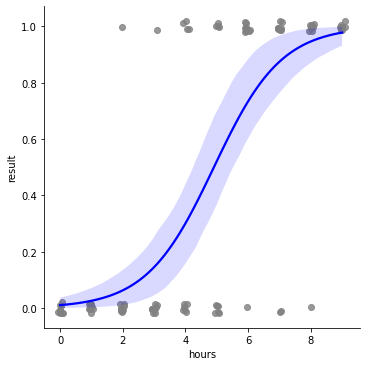

In [19]:
sns.lmplot(x = "hours", y = "result",
           data = test_result,
           logistic = True,
           scatter_kws= {"color":"gray"},
           line_kws={"color":"blue"},
           x_jitter=0.1, y_jitter=0.02)

## 预测成功概率

In [20]:
# 0 ~ 9 的公差为1的等差数列
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 成功概率的预测值
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 优势
成功和失败概率的比值**优势**,
p/(1-p)
$$
优势 = \frac{p}{(1 - p)}
$$
>优势的对数叫做*对数优势*

>>[如何优雅地在Markdown中输入数学公式](https://blog.csdn.net/m0_37167788/article/details/78809779)

logit函数也可以看作将成功概率转换成对数优势的函数
优势比，对数优势比

In [ ]:
# logistic回归系数与优势比的关系
# learn time up to 1 hour
exp_val_1 = pd.DataFrame({"hours":[1]})
pre_1 = mod_glm.predict(exp_val_1)

# learn time ups to 2 hours
exp_val_2 = pd.DataFrame({"hours":{2}})
pre_2 = mod_glm.predict(exp_val_2)

## 广义线性模型的评估
当总体不符合正态分布时，残差的处理方法会有很大的不同

残差是表现数据与模型不契合的程度的重要指标

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 用于估计统计模型的库（部分版本会报出警告信息）
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 设置浮点数精度
%precision 3
# 在Jupter Notebook 里显示图形
%matplotlib inline


In [6]:
# 读取数据
test_result = pd.read_csv('data/6-3-1-logistic-regression.csv')
# 模型化
mod_glm = smf.glm("result ~ hours", data = test_result, family =sm.families.Binomial()).fit()

### 皮尔逊残差
二项分布的皮尔逊残差计算公式如下:
$$
{Pearson\ residual} = \frac{y - N\hat{p}}{\sqrt{N\hat{p}(1 - \hat{p})}}
$$
y是响应变量，N是试验次数，$\hat{p}$(由mod_glm.predict()得到的预测值)是估计的成功概率